<a href="https://colab.research.google.com/github/DIPANJAN001/Forecasting-Solar-Energy/blob/master/pv_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.9 MB/s 


In [3]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [4]:
df=pd.read_excel("/content/pv_10.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [5]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	6
Reject

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=135,
                                         random_state=RandomState(MT19937) at 0x7F36A0614B40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F36A0614B40, verbose=2)

In [6]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 2
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.33, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [7]:
inputs1

<KerasTensor: shape=(None, 2, 23) dtype=float32 (created by layer 'input_1')>

In [8]:
from keras import optimizers

In [9]:
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/200
52/52 [==============================] - 16s 67ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2/200
52/52 [==============================] - 2s 37ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 3/200
52/52 [==============================] - 2s 37ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4/200
52/52 [==============================] - 2s 40ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/200
52/52 [==============================] - 2s 41ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 6/200
52/52 [==============================] - 2s 37ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 7/200
52/52 [==============================] - 2s 38ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 8/200
52/52 [==============================] - 2s 37ms/step - loss: 0

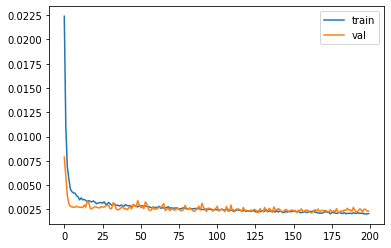

64/64 [==============================] - 3s 8ms/step


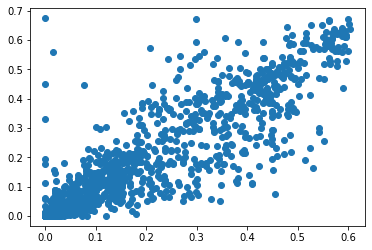

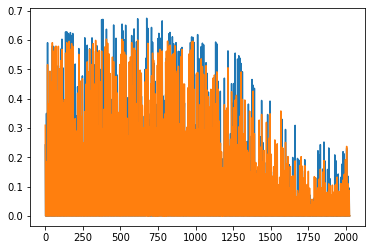

0.0685141246965632
0.03471849281757723


In [10]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/200
52/52 [==============================] - 15s 70ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2/200
52/52 [==============================] - 2s 38ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 3/200
52/52 [==============================] - 2s 36ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4/200
52/52 [==============================] - 2s 37ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 5/200
52/52 [==============================] - 2s 39ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 6/200
52/52 [==============================] - 2s 36ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 7/200
52/52 [==============================] - 2s 36ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 8/200
52/52 [==============================] - 2s 37ms/step - loss: 0

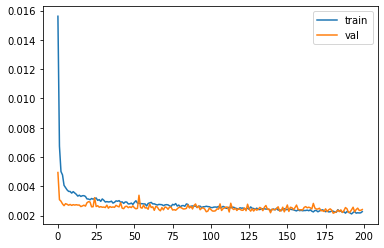

64/64 [==============================] - 2s 8ms/step


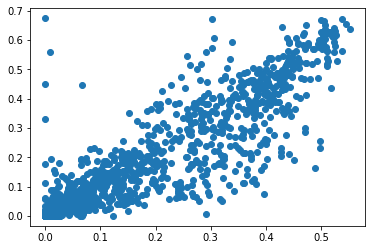

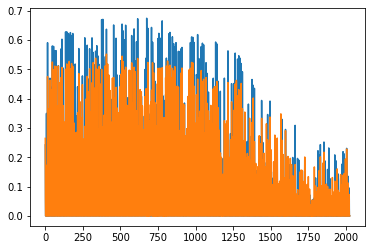

0.06683106056014429
0.034859741157526346


In [12]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [13]:
from keras.layers import Bidirectional

Epoch 1/100
52/52 [==============================] - 51s 155ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2/100
52/52 [==============================] - 5s 88ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3/100
52/52 [==============================] - 5s 88ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4/100
52/52 [==============================] - 5s 87ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 5/100
52/52 [==============================] - 4s 85ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 6/100
52/52 [==============================] - 5s 88ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 7/100
52/52 [==============================] - 6s 112ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 8/100
52/52 [==============================] - 5s 87ms/step - loss:

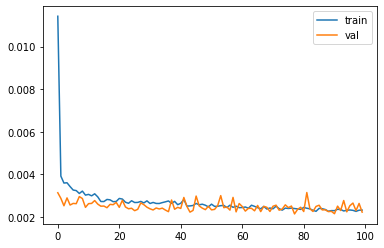

64/64 [==============================] - 5s 14ms/step


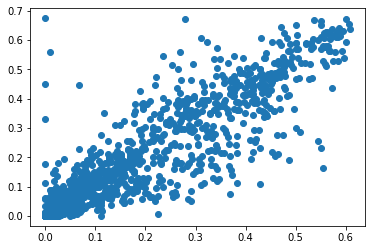

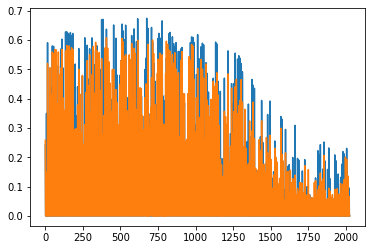

0.06458391035725626
0.032559126017206064


In [14]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/100
52/52 [==============================] - 33s 147ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 2/100
52/52 [==============================] - 4s 86ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 3/100
52/52 [==============================] - 4s 85ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4/100
52/52 [==============================] - 4s 83ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 5/100
52/52 [==============================] - 4s 84ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 6/100
52/52 [==============================] - 4s 85ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 7/100
52/52 [==============================] - 5s 87ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 8/100
52/52 [==============================] - 4s 84ms/step - loss: 

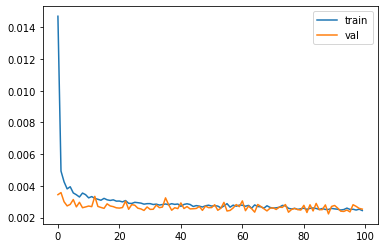

64/64 [==============================] - 4s 14ms/step


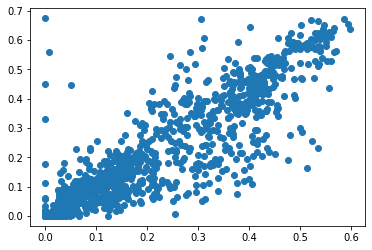

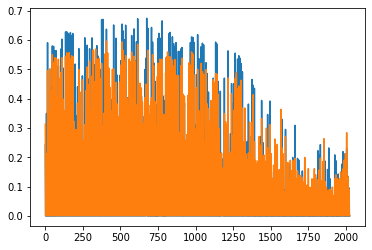

0.06506165226573109
0.034476925105431475


In [15]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))